# Machine Learning - Practical 1 - Linear Regression

Names: Felix, Alex, Till

Summer Term 2024   

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebooi and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 practicals to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

- Do not change the function interfaces.

## Imports

Jupyter Notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homewori assignment.

In [34]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [35]:
data = pd.read_csv('superconduct_train.csv')
print(data.shape)

(21263, 82)


In [36]:
data.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To maie the computations reproducible, we set the random seed. This maies the train and test splits same even if you re-run the notebooi. ieeping the splits same is important for the fair models comparison.

In [37]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
n_trainset = 200  # size of the training set
n_testset = 500  # size of the test set             

In [38]:
# set random seed to maie sure every test set is the same
np.random.seed(seed=1)

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):', X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):', X_train_full.shape, y_train_full.shape)

Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatter plots** relating the target variable to one of the feature values. For this you will need 81 scatter plots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marier size and the alpha blending value. 

Furthermore, we need to normalize the data, such that each feature has a mean of zero mean and a variance of one. Implement a function `normalize` which normalizes the data. Print the means and standard variation of the first five features before and after.

Text(0, 0.5, 'Number of elements out of 20763')

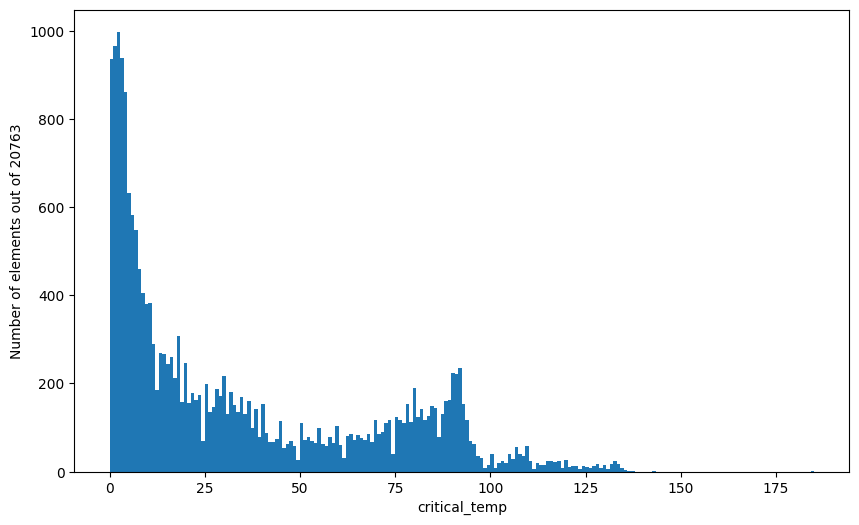

In [39]:
# Histogram of the target variable
plt.figure(figsize=(10,6))
n = 200
plt.hist(y_train_full, bins = n)
plt.xlabel(target_clm)
plt.ylabel(f"Number of elements out of {y_train_full.size}")

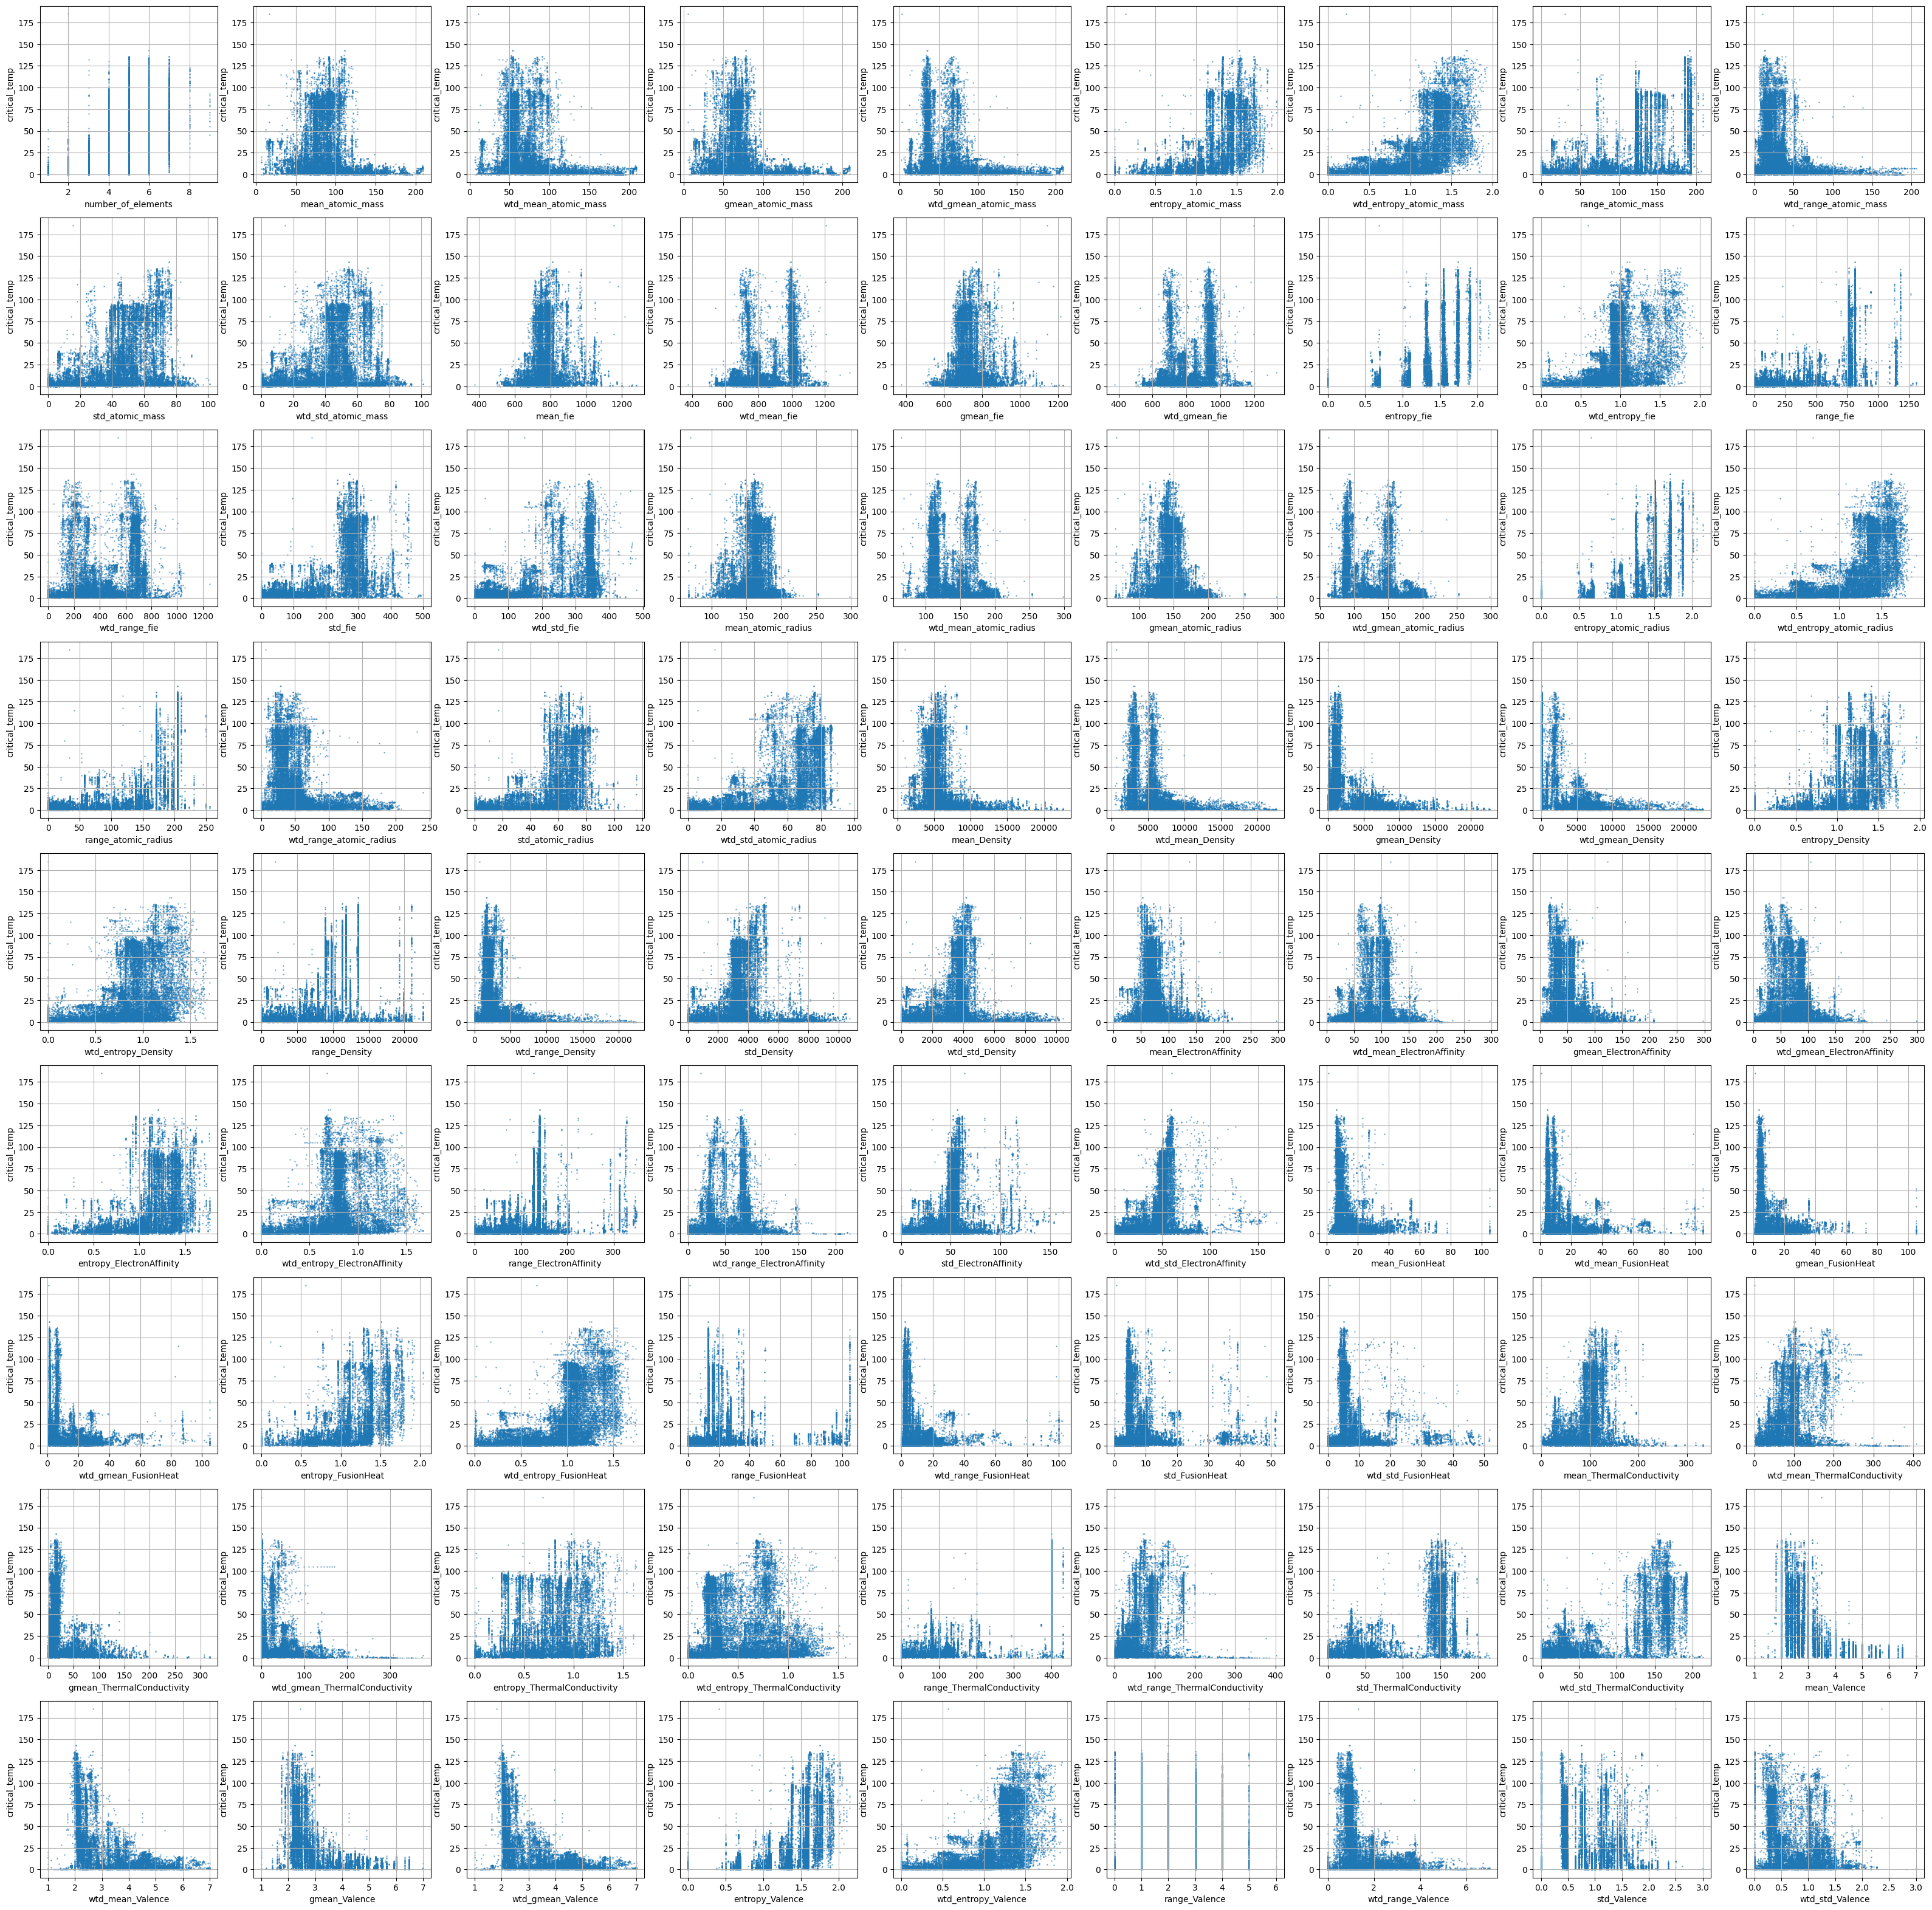

In [40]:
# Scatter plots of the target variable vs. features

plotnumber = 0
maxplot = 81
plt.figure(figsize=(40,40))

while plotnumber < maxplot:
    plt.subplot(9,9,plotnumber + 1)
    plt.scatter(X_train_full[:, plotnumber], y_train_full[:, 0], s = 0.7, alpha = 0.5)
    plt.xlabel(data.columns[plotnumber])
    plt.ylabel(target_clm)
    plt.grid()
    plotnumber += 1




In [41]:
# Normalize 
def normalize(data):
    norm = (data - data.mean())/data.std()
    return norm

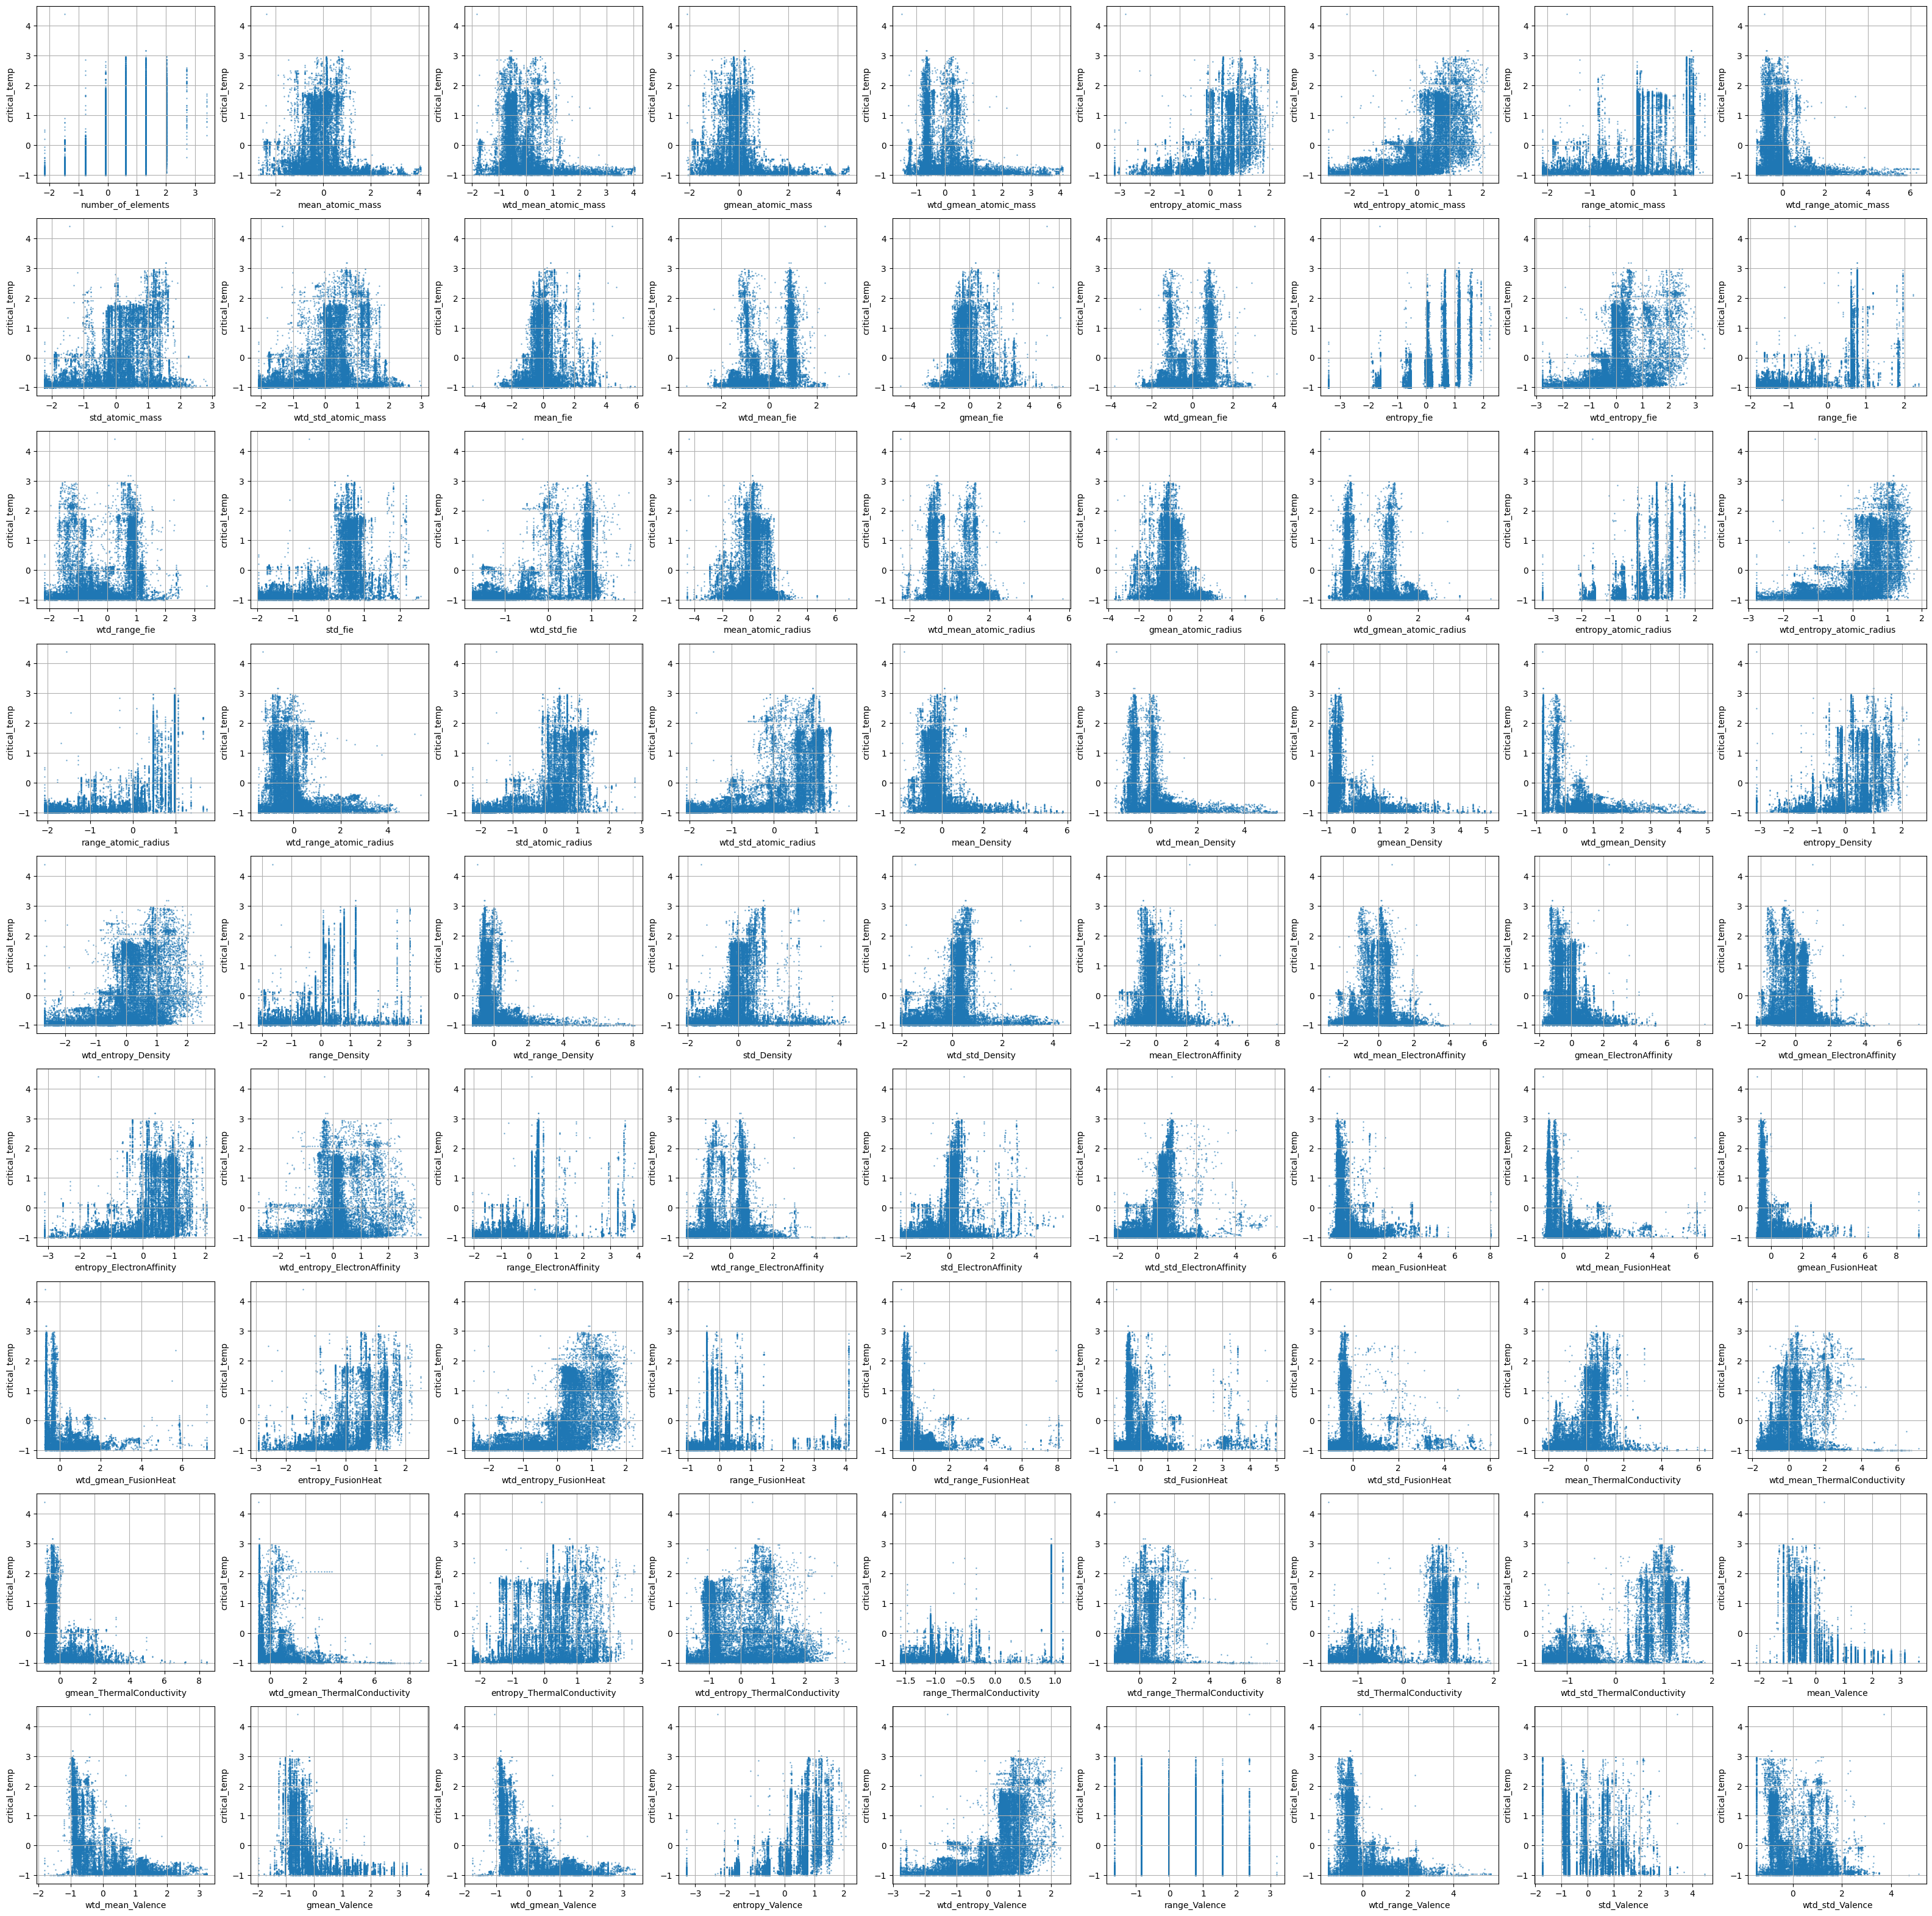

In [42]:
plotnumber = 0
maxplot = 81
plt.figure(figsize=(40,40))

y_norm = normalize(y_train_full[:, 0])

while plotnumber < maxplot:
    plt.subplot(9,9,plotnumber + 1)
    x_norm = normalize(X_train_full[:, plotnumber])
    plt.scatter(x_norm, y_norm, s = 0.7, alpha = 0.5)
    plt.xlabel(data.columns[plotnumber])
    plt.ylabel(target_clm)
    plt.grid()
    plotnumber += 1

In [43]:
print("\nbefore normalization: ")
for i in range(5):
    print(f"mean = {X_train_full[:, i].mean()},\t std = {X_train_full[:, i].std()}")
    
print("\nafter normalization: ")
for i in range(5):
    x_norm = normalize(X_train_full[:, i]) 
    print(f"mean = {x_norm.mean()},\t std = {x_norm.std()}")


#Normalise the data and overwrite
for i in range(len(X_test[0])):
    X_test[:, i] = normalize(X_test[:, i]) 
    X_train[:, i] = normalize(X_train[:, i])


before normalization: 
mean = 4.112218850840438,	 std = 1.4396048331710802
mean = 87.60808136583881,	 std = 29.702997335967
mean = 73.04988360343053,	 std = 33.56235884855743
mean = 71.34256083274673,	 std = 31.075554104235316
mean = 58.6033566064307,	 std = 36.73208565810088

after normalization: 
mean = -2.0464506862425464e-16,	 std = 0.9999999999999998
mean = -2.8198584706753485e-16,	 std = 1.0
mean = 1.1430008849582116e-16,	 std = 1.0
mean = 1.8274325525978592e-16,	 std = 1.0
mean = -1.6426360023351542e-17,	 std = 1.0


Which material properties may be useful for predicting superconductivity? What other observations can you make?

Linear relations hint that the properties are connected:

not suited: number of elements, entropy atomic radius, wtd_mean_atomic_radius

suited: wtd_std_atomic_radius, wtd_range_valence, most graphs connected with fusion heat

## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To maie life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [44]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred, s=2)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

(500,)
MSE:  17928.79570726673
r^2:  -13.313953173396845


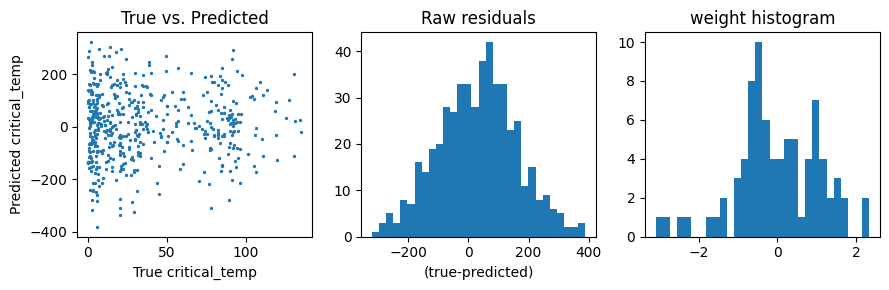

In [45]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_testing = np.random.randn(y_test.size) * np.max(y_test)
print(y_pred_testing.shape)
plot_regression_results(y_test, y_pred_testing, weights)

In [46]:
#Just playing and testing around
a = np.linalg.pinv(X_train)
print(a.shape)
print(y_train.shape)
c = np.matmul(np.linalg.pinv(X_train), y_train)
print(c.shape)
# = np.transpose(c)
print(X_test.shape)
e = np.matmul(X_test, c)
print(e.shape)

print("lala")
#print(X_train.shape)
#ones = np.transpose([np.ones(200)])
#neu = np.append(X_train, ones, axis = 1)
#neu = np.insert(X_train, 0, 1, axis=1)
#print(neu.shape)
#print(neu)

print(y_train.shape)

(81, 200)
(200, 1)
(81, 1)
(500, 81)
(500, 1)
lala
(200, 1)


Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regression result, you should get mean squared error of 707.8.

In [47]:
def ols_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    
    
    #Input configuration
    X_train_new = np.insert(X_train, 0, 1, axis=1)
    X_test_new = np.insert(X_test, 0, 1, axis=1)
    
    #Solving
    pseudo = np.linalg.pinv(X_train_new)
    weights = np.matmul(pseudo,y_train)
    y_pred = np.matmul(X_test_new, weights)

    # ---------------- END CODE -------------------------

    return weights, y_pred

MSE:  707.8008845059949
r^2:  0.43490745935593966


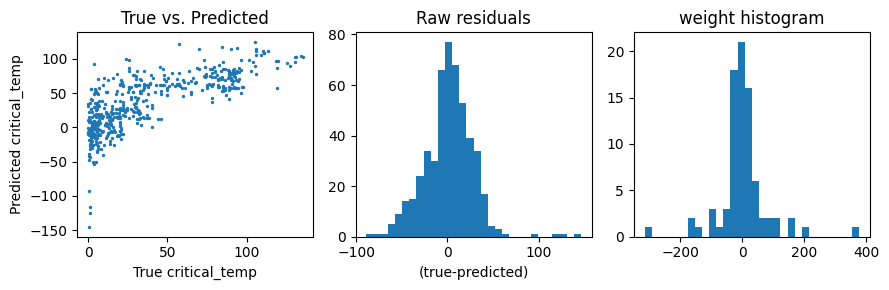

In [48]:
# Plots of the results


weights, y_pred = ols_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

What do you observe? Is the linear regression model good?

The random scatteres data do not schow linear dependence, therefore we aobserve a broad distribution far away from zero in the raw residual and in the weight histogrm plot. In comparison, the test data show linear dependence. Also the raw residuals and the weight histogram plots are more centered around zero.

## Task 3: Compare your implementation to sklearn

Now, familiarize yourself with the silearn library. In the section on linear models:

https://sciiit-learn.org/stable/modules/classes.html#module-silearn.linear_model

you will find `silearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this silearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [49]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the silearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The silearn library automatically taies care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    reg = linear_model.LinearRegression().fit(X_train, y_train)
    weights = reg.coef_
    y_pred = reg.predict(X_test)


    # ---------------- END CODE -------------------------

    return weights, y_pred

(81,)
MSE:  707.8008845059942
r^2:  0.4349074593559402


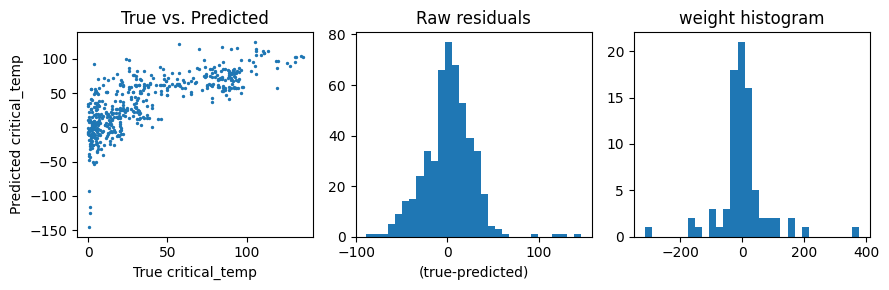

In [50]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
print(weights[0].shape)
plot_regression_results(y_test, y_pred, weights[0])

If you implemented everything correctly, the MSE is again 707.8.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

MSE:  4636.5061039821385
r^2:  -2.7016837240032716


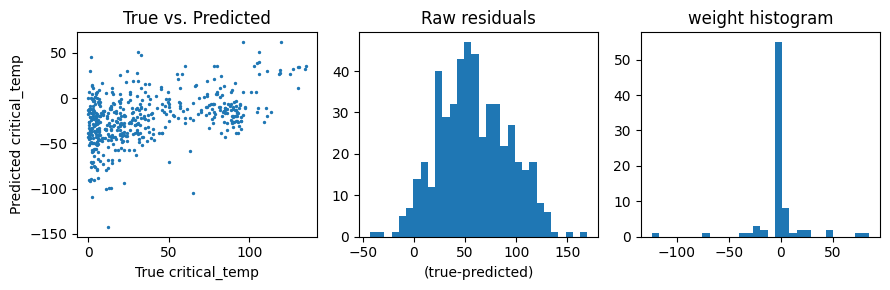

In [51]:
weights, y_pred = sklearn_regression(X_test, X_train_full, y_train_full)
plot_regression_results(y_test, y_pred, weights[0])

 How does test set performance change? What else changes?

MSE gets higher as more errors occur due to higher training data.
As more data is considered, the weight histogram peaks stronger at zero while distribution is less strong.

## Tasi 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (X^TX + \alpha I_D)^{-1}X^Ty$


as a function that can taie different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved ieyword in Python.

In [52]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha
       on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regression model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    #Input configuration
    X_train_new = np.insert(X_train, 0, 1, axis=1)
    X_test_new = np.insert(X_test, 0, 1, axis=1)
    
    #Solving
    D = np.matmul(X_train_new.T, X_train_new)
    left = np.matmul(np.linalg.inv(D + alpha * np.identity(len(D))), X_train_new.T)
    weights = np.matmul(left, y_train)
    y_pred = np.matmul(X_test_new, weights)


    # ---------------- END CODE -------------------------

    return weights, y_pred

Run the ridge regression on `X_train` with an alpha value of 10 and plot the obtained weights.

MSE:  428.09796358695974
r^2:  0.6582160729330728


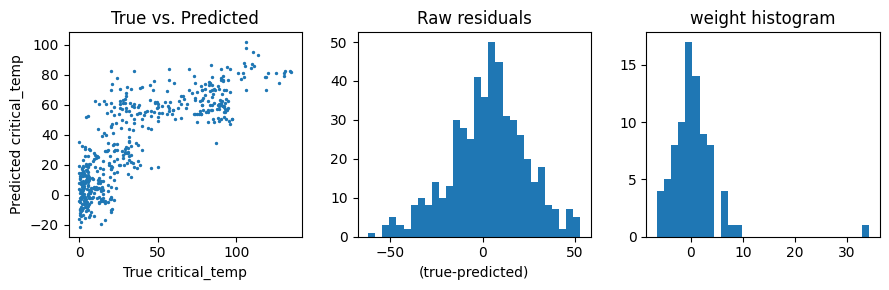

In [53]:
# Run ridge regression with alpha=10
alpha = 10
weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha)
# Plot regression results
plot_regression_results(y_test, y_pred, weights)

Now test a range of log-spaced $\alpha\text{s}$ (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from silearn (imported above) to compute the MSE.


In [54]:
alphas = np.logspace(-7, 7, 20)

# ---------------- INSERT CODE ----------------------
errorsaving = np.zeros(len(alphas))
weightsaving = np.zeros((len(alphas),82))
for index, alpha in enumerate(alphas):
    weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha)
    errorsaving[index] = mean_squared_error(y_test, y_pred)
    weightsaving[index] = weights[:,0]


# print(errorsaving)
# print(weightsaving)

# ---------------- END CODE -------------------------

Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also thini about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

Text(0, 0.5, 'weights')

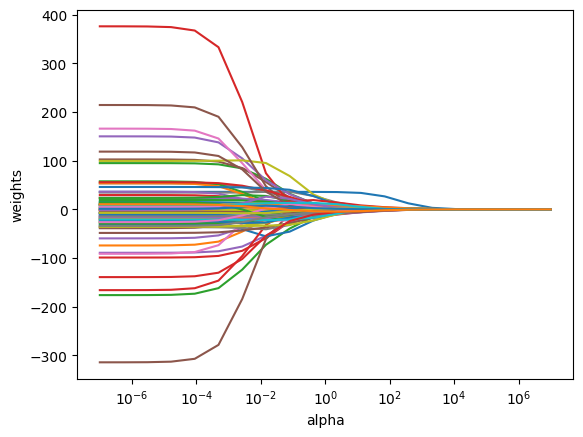

In [55]:
# Plot of Weights  vs. alphas
plt.plot(alphas, weightsaving)
plt.xscale("log")#
plt.xlabel("alpha")
plt.ylabel("weights")

Why are the values of the weights largest on the left? Do they all change monotonically? 

Low alpha have low impact on the weight distribution, therefore high alpha compresses all weights to zero. They dont all change monotonically as can be seen in the blue curve. (which dips down around 1e-2)

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity checi, the MSE value for very small $\alpha$ should be close to the test-set MSE of the unregularized solution, i.e. 708.

alpha for minimal MSE: 12.742749857031322


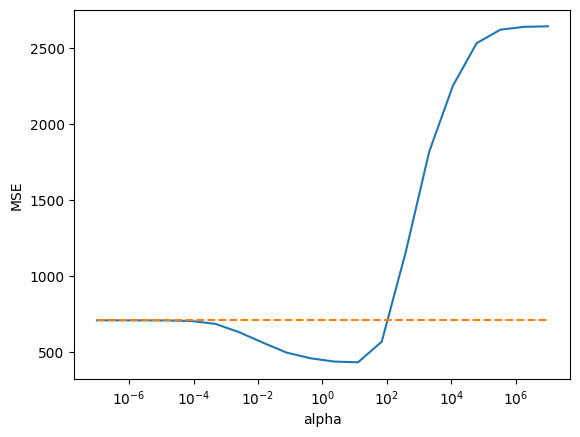

In [56]:
# Plot of MSE  vs. alphas
plt.plot(alphas, errorsaving)
plt.plot((1e-7, 1e7), (708, 708), linestyle="--")
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("MSE")


alpha_test_set = alphas[np.argmin(errorsaving)]
print("alpha for minimal MSE:", alpha_test_set)

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~700 on the left?

As alpha=0 reproduces ode_regession, it leads to the exact same result (MSE=708). It is better than the unregularized model since for alphas between 0 and 1e^2 the MSE is below 708, having a minimum for alpha = 12,7. If alpha gets too high the results become worse since all weights are compressed to zero.

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [68]:
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the silearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The silearn library automatically taies care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    reg = linear_model.Ridge(alpha).fit(X_train, y_train)
    weights = reg.coef_
    y_pred = reg.predict(X_test)


    # ---------------- END CODE -------------------------

    return weights, y_pred

This time, only plot how the performance changes as a function of $\alpha$. 

Text(0, 0.5, 'MSE')

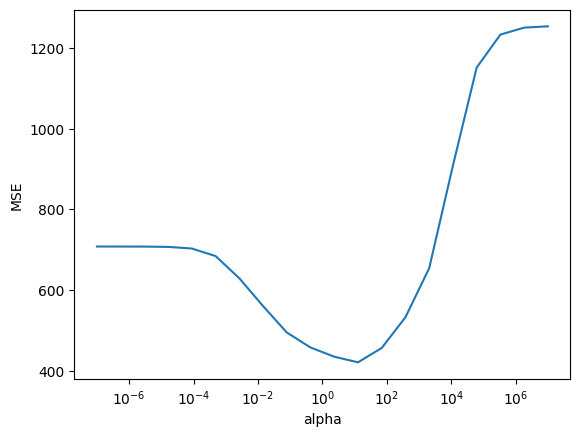

In [69]:
# Plot of MSE  vs. alphas
alphas = np.logspace(-7, 7, 20)

# ---------------- INSERT CODE ----------------------
errorsaving = np.zeros(len(alphas))
weightsaving = np.zeros((len(alphas),81))
for index, alpha in enumerate(alphas):
    weights, y_pred = ridge_regression_sklearn(X_test, X_train, y_train, alpha)
    errorsaving[index] = mean_squared_error(y_test, y_pred)
    weightsaving[index] = weights[0]

plt.plot(alphas, errorsaving)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("MSE")

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to silearn. However, qualitatively it should looi the same.

## Tasi 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms liie $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [72]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility. 
    '''

    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)

    # ---------------- INSERT CODE ----------------------

    from sklearn.utils import shuffle  # why does np.random.permutation not work on X, y ?
    X, y = shuffle(X, y)
    
    
    for k, alpha in enumerate(alphas):
        for i in range(n_folds):
            fold_length = len(X)//n_folds
            
            X_train = np.delete(X, range(i*fold_length, (i+1)*fold_length),  axis=0)     # without the i-th fold
            y_train = np.delete(y, range(i*fold_length, (i+1)*fold_length),  axis=0)     
            X_test = X[i*fold_length : (i+1)*fold_length]                                 # the i-th fold
            y_test = y[i*fold_length : (i+1)*fold_length]                                 
            
            _, y_pred = ridge_regression(X_test, X_train, y_train, alpha)
            cv_results_mse[i,k] = mean_squared_error(y_test, y_pred)

    # ---------------- END CODE -------------------------

    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [73]:
alphas = np.logspace(-7, 7, 100)
mse_cv = ridgeCV(X_train, y_train, n_folds=10, alphas=alphas)

We plot the MSE trace for each fold separately:

Text(0, 0.5, 'MSE')

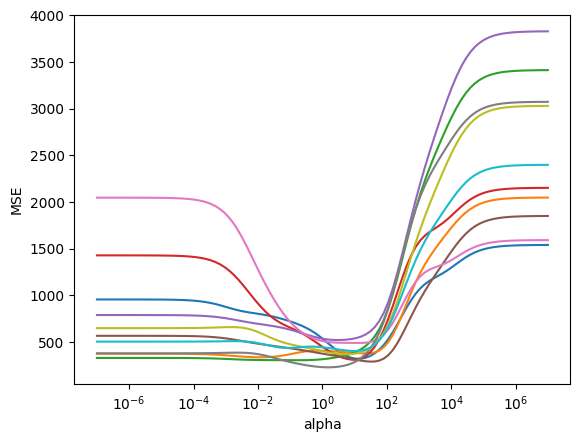

In [74]:
plt.plot(alphas, mse_cv.T)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')

We also plot the average across folds:

alpha for minimal MSE: 5.994842503189409
alpha_test_set - alpha_cross_validation = 6.747907353841914


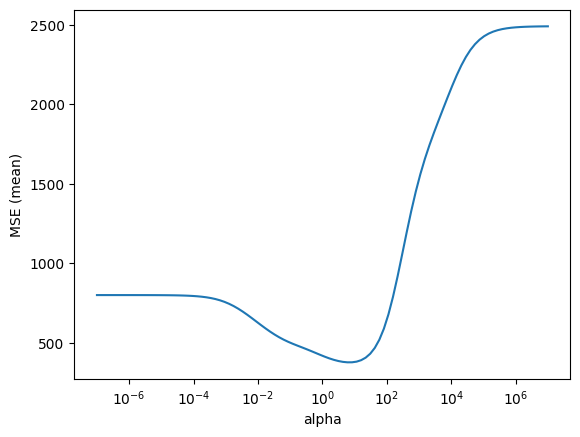

In [75]:
plt.plot(alphas, np.mean(mse_cv, axis=0))
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE (mean)')

alpha_cross_validation = alphas[np.argmin(np.mean(mse_cv, axis=0))]
print("alpha for minimal MSE:", alpha_cross_validation)
print("alpha_test_set - alpha_cross_validation =", alpha_test_set - alpha_cross_validation)

What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

Optimall alpha = 6 and is therefore not similar to the previous optimal alpha, it is 6,74 lower. This change is not strong in comparison to the large scale of alpha values we used. 

We will now run cross-validation on the full training data. This will taie a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [63]:
alphas = np.logspace(-7, 7, 100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, 10, alphas)

Text(0, 0.5, 'MSE')

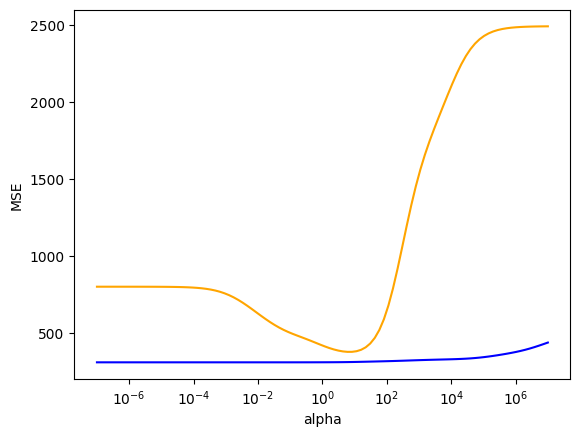

In [64]:
plt.plot(alphas, np.mean(mse_cv_full, axis=0), color="b")
plt.plot(alphas, np.mean(mse_cv, axis=0), color="orange")

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')

We zoom in on the blue curve to the very left:

alpha for minimal MSE: 0.03274549162877725


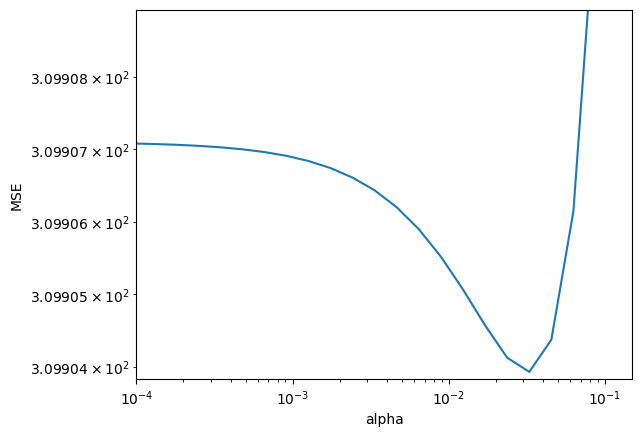

In [76]:
plt.plot(alphas, np.mean(mse_cv_full, axis=0))
plt.xscale('log')
plt.yscale('log')

minValue = np.min(np.mean(mse_cv_full, axis=0))
plt.ylim([minValue-.0001, minValue+0.005])
plt.xlim([0.0001, 0.15])

plt.xlabel('alpha')
plt.ylabel('MSE')


alpha_cross_validation_full = alphas[np.argmin(np.mean(mse_cv_full, axis=0))]
print("alpha for minimal MSE:", alpha_cross_validation_full)

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

More data lead to better predicions of the model, it also allows the ridgeCV to make better predictions with smaller alphas. (Bias Variance Tradeoff) High datasets allow low bias, high variance and produce best prediction so far.